<a href="https://colab.research.google.com/github/NityaVerma19/Customer-Purchase-Decision-/blob/master/Consumer_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import omni_normtest


#Generating a dataset

In [5]:
df = pd.read_csv("/content/consumer behaviour.csv")

In [6]:
df.head()

,age,income,gender,price,product,green_pack,purchase
0,30,45000,0,1200,Beverage,1,1
1,45,80000,1,3500,Clothing,0,0
2,55,110000,0,2500,Beauty,1,1
3,40,60000,1,700,Food,0,1
4,25,30000,0,800,Personal hygiene,1,0


In [7]:
df.shape

(256, 7)

In [8]:
df['product'].unique()

array(['Beverage', 'Clothing', 'Beauty', 'Food', 'Personal hygiene',
       'Paper products'], dtype=object)

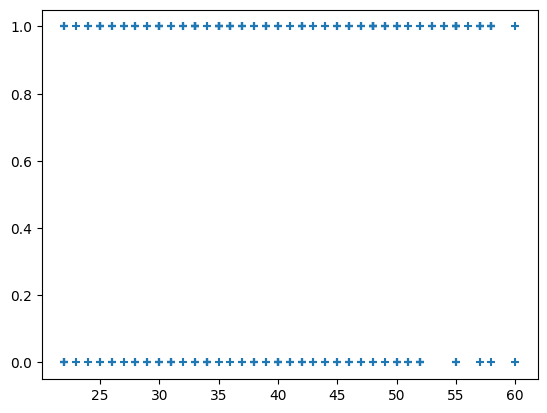

In [9]:
plt.scatter(df.age, df.purchase, marker = "+")

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,income,gender,price,green_pack,purchase
age,1.000000,0.933182,-0.112137,0.842078,-0.262613,0.082659
income,0.933182,1.000000,-0.089255,0.891151,-0.269323,0.098181
gender,-0.112137,-0.089255,1.000000,-0.175349,-0.116391,-0.117403
price,0.842078,0.891151,-0.175349,1.000000,-0.293047,0.065726
green_pack,-0.262613,-0.269323,-0.116391,-0.293047,1.000000,0.093953
purchase,0.082659,0.098181,-0.117403,0.065726,0.093953,1.000000



---





# Logistic Regression


In [11]:
#feature variable

X = df.drop(columns = ['purchase'], axis= 1)


#target variable

y = df.purchase.values



In [12]:
X.head()

,age,income,gender,price,product,green_pack
0,30,45000,0,1200,Beverage,1
1,45,80000,1,3500,Clothing,0
2,55,110000,0,2500,Beauty,1
3,40,60000,1,700,Food,0
4,25,30000,0,800,Personal hygiene,1


In [13]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((204, 6), (52, 6))

*204 rows in training dataset*
*52 rows in testiing dataset*

*Feature engineering*

In [15]:
# display categorical variables
for col in X_train.columns:
  if X_train[col].dtypes == 'O':
    print(col)

product


In [16]:
#display numerical variables

for col in X_train.columns:
  if X_train[col].dtypes != 'O':
    numerical = col

In [17]:
X_train.describe()

,age,income,gender,price,green_pack
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,39.911765,71975.490196,0.514706,2012.745098,0.519608
std,10.475966,27528.120638,0.501013,1122.907167,0.500844
min,22.000000,25000.000000,0.000000,300.000000,0.000000
25%,31.000000,48000.000000,0.000000,1075.000000,0.000000
50%,39.000000,70000.000000,1.000000,1800.000000,1.000000
75%,49.000000,90000.000000,1.000000,2800.000000,1.000000
max,60.000000,130000.000000,1.000000,4800.000000,1.000000


In [18]:
cols = X_train.columns
cols                #everything except purchase

Index(['age', 'income', 'gender', 'price', 'product', 'green_pack'], dtype='object')

In [19]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


*Endoding categorical variable*

In [20]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['product'])        #The BinaryEncoder is a type of categorical encoding technique that represents each category as a binary number

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,age,income,gender,price,product_0,product_1,product_2,green_pack
159,44,85000,0,2500,0,0,1,1
76,33,55000,1,1200,0,0,1,1
59,30,45000,1,1200,0,0,1,1
215,55,120000,0,3800,0,1,0,0
232,37,68000,0,1800,0,0,1,1


In [22]:
X_train = pd.concat([X_train[numerical], X_train[['product_0', 'product_1', 'product_2']]], axis=1)

X_train.head()


,green_pack,product_0,product_1,product_2
159,1,0,0,1
76,1,0,0,1
59,1,0,0,1
215,0,0,1,0
232,1,0,0,1


In [23]:
X_test = pd.concat([X_test[numerical], X_test[['product_0', 'product_1', 'product_2']]], axis=1)

X_test.head()


,green_pack,product_0,product_1,product_2
158,1,0,1,1
83,1,1,1,0
170,1,0,1,1
101,1,0,0,1
150,1,0,1,0


*Feature Scaling*

In [24]:
cols = X_train.columns

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [27]:
X_test = pd.DataFrame(X_test, columns=[cols])

*Model Training*

In [36]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(C = 0.5, solver='liblinear', random_state=1)


# fit the model
result = logreg.fit(X_train, y_train)

In [38]:
result

LogisticRegression(C=0.5, random_state=1, solver='liblinear')

*Predict Results*

In [29]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# probability of getting output as 0 - no purchase

logreg.predict_proba(X_test)[:,0]

array([0.26122511, 0.26920113, 0.26122511, 0.3217622 , 0.32475216,
       0.3217622 , 0.26920113, 0.32475216, 0.26122511, 0.26920113,
       0.38664957, 0.39640037, 0.3217622 , 0.3217622 , 0.46161955,
       0.46840196, 0.26122511, 0.46840196, 0.39640037, 0.26122511,
       0.46840196, 0.33075907, 0.39640037, 0.38664957, 0.46161955,
       0.45822459, 0.3217622 , 0.26920113, 0.26920113, 0.46161955,
       0.26920113, 0.32475216, 0.26920113, 0.46840196, 0.3217622 ,
       0.26122511, 0.26122511, 0.46840196, 0.33075907, 0.32475216,
       0.45822459, 0.33075907, 0.46161955, 0.45822459, 0.33075907,
       0.45822459, 0.38664957, 0.26920113, 0.46840196, 0.38664957,
       0.32475216, 0.26920113])

In [31]:
# probability of getting output as 1 - purchase

logreg.predict_proba(X_test)[:,1]

array([0.73877489, 0.73079887, 0.73877489, 0.6782378 , 0.67524784,
       0.6782378 , 0.73079887, 0.67524784, 0.73877489, 0.73079887,
       0.61335043, 0.60359963, 0.6782378 , 0.6782378 , 0.53838045,
       0.53159804, 0.73877489, 0.53159804, 0.60359963, 0.73877489,
       0.53159804, 0.66924093, 0.60359963, 0.61335043, 0.53838045,
       0.54177541, 0.6782378 , 0.73079887, 0.73079887, 0.53838045,
       0.73079887, 0.67524784, 0.73079887, 0.53159804, 0.6782378 ,
       0.73877489, 0.73877489, 0.53159804, 0.66924093, 0.67524784,
       0.54177541, 0.66924093, 0.53838045, 0.54177541, 0.66924093,
       0.54177541, 0.61335043, 0.73079887, 0.53159804, 0.61335043,
       0.67524784, 0.73079887])

In [44]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.640570
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  204
Model:                          Logit   Df Residuals:                      200
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                 0.02603
Time:                        21:26:39   Log-Likelihood:                -130.68
converged:                       True   LL-Null:                       -134.17
Covariance Type:            nonrobust   LLR p-value:                   0.07236
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
green_pack     0.5961      0.281      2.121      0.034       0.045       1.147
product_0      0.1796      0.

In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Confusion Matrix:
[[ 0 18]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.65      1.00      0.79        34

    accuracy                           0.65        52
   macro avg       0.33      0.50      0.40        52
weighted avg       0.43      0.65      0.52        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Checking Accuracy

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6538


In [33]:
logreg.score(X_test,y_test)


0.6538461538461539

In [35]:
gfg = omni_normtest(X_test)
gfg

NormaltestResult(statistic=array([2258.09634932, 1245.52966993,  472.16260464, 2258.09634932]), pvalue=array([0.00000000e+000, 3.44087307e-271, 2.95932813e-103, 0.00000000e+000]))